<a href="https://colab.research.google.com/github/Alexx009/WebScraperiz/blob/main/Workout%20Behavior%20Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing library and datasets in the notebook

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/gym_members_exercise_tracking.csv')

## Data Cleaning

In [73]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


Changing column name to smallest to proper case and spacing

In [74]:
df.columns = ['age', 'gender', 'weight_kg', 'height_m', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration_hours', 'calories_burned',
       'workout_type', 'fat_percentage', 'water_intake_liters',
       'workout_frequency_days/week', 'experience_level', 'bmi']
df.head()

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [75]:
def categorize_xp_level(experience_levels):
  if experience_levels == 3:
    return 'advance'
  elif experience_levels == 2:
    return 'intermediate'
  else:
    return 'beginner'
df['experience_category'] = df['experience_level'].apply(categorize_xp_level)


## Data Analyzation

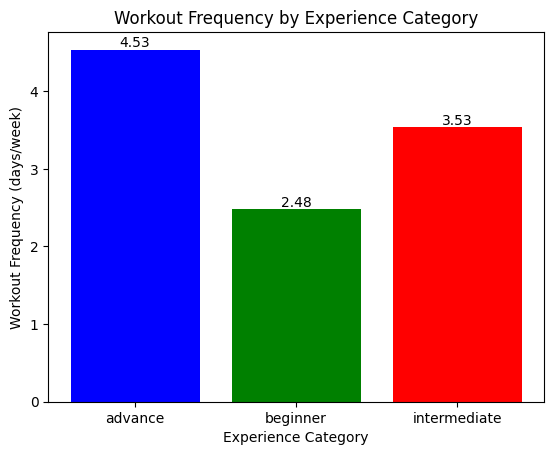

In [79]:
experience_vs_workoutFrequency = df.groupby('experience_category')['workout_frequency_days/week'].mean()
# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple']

# Create bar chart
bars = plt.bar(experience_vs_workoutFrequency.index, experience_vs_workoutFrequency.values, color=colors)

# Add labels and title
plt.xlabel('Experience Category')
plt.ylabel('Workout Frequency (days/week)')
plt.title('Workout Frequency by Experience Category')


# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


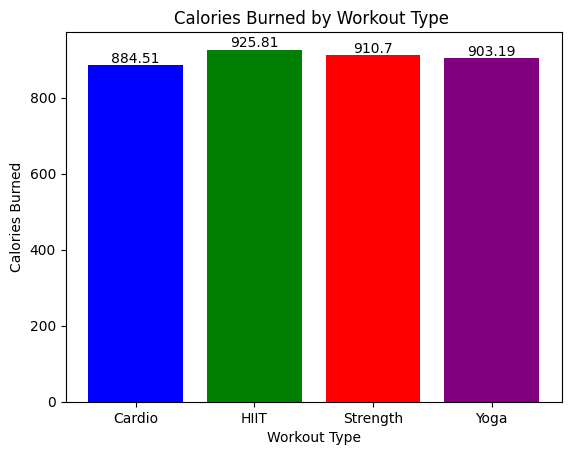

In [81]:
workout_type_vs_cal_burned = df.groupby('workout_type')['calories_burned'].mean()

# Create bar chart
bars = plt.bar(workout_type_vs_cal_burned.index, workout_type_vs_cal_burned.values, color=colors)

# Add labels and title
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.title('Calories Burned by Workout Type ')


# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


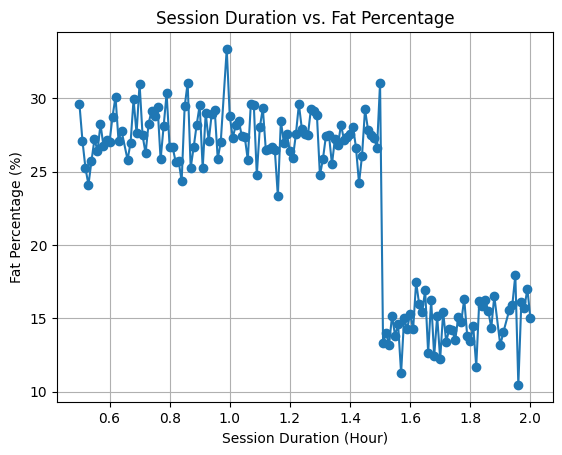

In [90]:
ses_dur_vs_fat_perc = df.groupby('session_duration_hours')['fat_percentage'].mean()

# Create bar chart
line = plt.plot(ses_dur_vs_fat_perc.index, ses_dur_vs_fat_perc.values, marker='o')

# Adding labels and title
plt.xlabel('Session Duration (Hour)')
plt.ylabel('Fat Percentage (%)')
plt.title('Session Duration vs. Fat Percentage')

# Adding grid
plt.grid(True)

# Display the plot
plt.show()


# Narrative Summary: Workout Behavior Patterns

### Workout Frequency vs Experience Level

The data reveals that people who have more experience people are more first to workout consistentcy followed up by intermediate and the lowest workout consistentcy are people who is begginners in the gym. This shows that people who are expert, shows more confident and disipline to their workouts.

### Calories Burned vs Workout Type

The graph shows different workout type is vary in burning calories. The data shows that High-intensity interval training(HIIT) and Streght have more calories burned compare to Yoga and Cardio. this indicates that the higher the intensity tend to yield higher energy expenditure per session.

### Session Duration vs Fat Percentage

The data shows that the lower the Fat percentage tends to have engage in a longer session. this reflects benefits of extended physical activity and improved endurance that often related to lower fat levels.

## Recomendation

### To optimize fitness outcome

*   Beginners should aim go to the gym more often to gradually increase their workout frequency to build consistency and move toward higher levels

*  Incorporating HIIT and Strength Training can be particularly effective for those aiming to maximize calorie burn in shorter timeframes.

*   For those targeting fat loss, extending workout routine hours while maintaining proper intensity and recovery can be beneficial. However, it's important to tailor workouts to individual fitness levels to avoid overtraining.

A balanced approach that combines frequency, intensity, and duration and aligned with personal goals and fitness category will yield the best long term results.



